In [1]:
import yfinance as yf
import numpy as np

In [2]:
df = yf.download(["AAPL", "MSFT"], start = "2015-11-30", end = "2023-07-26")
df

[*********************100%***********************]  2 of 2 completed


Adj Close                   Close                    High  \
                  AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2015-11-30   26.996754   48.499481   29.575001   54.349998   29.852501   
2015-12-01   26.777678   49.275829   29.334999   55.220001   29.702499   
2015-12-02   26.535769   49.266899   29.070000   55.209999   29.527500   
2015-12-03   26.289310   48.365627   28.799999   54.200001   29.197500   
2015-12-04   27.163345   49.891560   29.757500   55.910000   29.812500   
...                ...         ...         ...         ...         ...   
2023-07-19  195.100006  355.079987  195.100006  355.079987  198.229996   
2023-07-20  193.130005  346.869995  193.130005  346.869995  196.470001   
2023-07-21  191.940002  343.769989  191.940002  343.769989  194.970001   
2023-07-24  192.750000  345.109985  192.750000  345.109985  194.910004   
2023-07-25  193.619995  350.980011  193.619995  350.980011  194.440002   

                               Low                    Open              \
                  MSFT        AAPL        MSFT        AAPL        MSFT   
Date                                                                     
2015-11-30   54.959999   29.437500   54.000000   29.497499   54.540001   
2015-12-01   55.230000   29.215000   54.299999   29.687500   54.410000   
2015-12-02   55.959999   29.020000   55.060001   29.334999   55.320000   
2015-12-03   55.770000   28.555000   53.930000   29.137501   55.490002   
2015-12-04   56.230000   28.777500   54.099998   28.822500   54.119999   
...                ...         ...         ...         ...         ...   
2023-07-19  362.459991  192.649994  352.440002  193.100006  361.750000   
2023-07-20  357.970001  192.500000  345.369995  195.089996  353.570007   
2023-07-21  350.299988  191.229996  339.829987  194.100006  349.149994   
2023-07-24  346.920013  192.250000  342.309998  193.410004  345.850006   
2023-07-25  351.890015  192.919998  345.070007  193.330002  347.109985   

               Volume            
                 AAPL      MSFT  
Date                             
2015-11-30  156721200  56241400  
2015-12-01  139409600  39952800  
2015-12-02  133546400  47274900  
2015-12-03  166278000  38627800  
2015-12-04  231108000  43963700  
...               ...       ...  
2023-07-19   80507300  39732900  
2023-07-20   59581200  33778400  
2023-07-21   71917800  69368900  
2023-07-24   45377800  26678100  
2023-07-25   37283200  41637700  

[1925 rows x 12 columns]

In [3]:
df = np.log(1+df["Adj Close"].pct_change())
df

,AAPL,MSFT
Date,,
2015-11-30,NaN,NaN
2015-12-01,-0.008148,0.015881
2015-12-02,-0.009075,-0.000181
2015-12-03,-0.009331,-0.018463
2015-12-04,0.032706,0.031062
...,...,...
2023-07-19,0.007047,-0.012343
2023-07-20,-0.010149,-0.023393
2023-07-21,-0.006181,-0.008977


In [4]:
weights = [0.5, 0.5] #This assigns the stock weightage to a list
weights[0]*df["AAPL"].mean() + weights[1]*df["MSFT"].mean() #This assigns equal weightings to the mean returns.
#OR
np.dot(df.mean(), weights) #performs the dot product between the mean values of the columns in df and the elements in the weights list. The dot product is a mathematical operation that multiplies the corresponding elements of two vectors and then sums up the results.

0.0010263401759325014

## Portfolio Returns 

In [5]:
#The np.dot(df.mean(), weights) can also be written as a function:
def portfolioreturn(weights):
    return np.dot(df.mean(), weights)

portfolioreturn(weights)

0.0010263401759325014

In [6]:
df.cov() #This calculates covariance between stocks.

,AAPL,MSFT
AAPL,0.000351,0.000240
MSFT,0.000240,0.000313


In [7]:
#Calculating Portfolio Variance. This formula is given by the MPT formula.
pv = weights[0]**2*df.cov().iloc[0,0]+weights[1]**2*df.cov().iloc[1,1]+2*weights[0]*weights[1]*df.cov().iloc[0,1]
pv

0.00028598036226777293

In [8]:
pv**(0.5) #To convert variance to standard deviation.

0.01691095391359615

In [9]:
#pv can also be calculated like this:
np.dot(np.dot(df.cov(), weights), weights)

0.00028598036226777293

In [10]:
#To find s.d. from above: 
np.dot(np.dot(df.cov(), weights), weights)**0.5

0.01691095391359615

In [11]:
#We should write the s.d. above as a function:
def portfoliostd(weights):
    return np.dot(np.dot(df.cov(), weights), weights)**0.5*np.sqrt(250) #Where 250 is the number of trading days in a year.
portfoliostd(weights)

0.26738565886551063

## Creating random weights

In [12]:
# rand is an array, which is like a list or a series of items that are arranged in a particular order.
def weightscreator(df):
    rand = np.random.random(len(df.columns)) #np.random.random() will return a single random number if you don't include any argument, which in this case is len(df.columns). 
    rand /= rand.sum() # This divides each element in the rand array by the total sum, forcing it to be equal to 1.
    return rand

weightscreator(df)

array([0.73370785, 0.26629215])

In [13]:
returns = [] # These are lists used to store the results of a simulation process.
stds = []
w = [] # Note: w is used to store the results of 500 different weights.

for i in range(500):   # This creates a loop 500 times.
    weights = weightscreator(df)
    returns.append(portfolioreturn(weights)) # append allows you to add an element to the end of a list.
    stds.append(portfoliostd(weights))
    w.append(weights)

In [14]:
returns # This generates 500 different returns.

[0.001027054958807337,
 0.001028476538902186,
 0.0010256620353064061,
 0.0010255157167544163,
 0.0010262837534945654,
 0.0010271416715390347,
 0.0010260350743646859,
 0.0010256675793980127,
 0.001028045449119136,
 0.001026223730936327,
 0.0010266647567858506,
 0.001026807050012613,
 0.0010280652421030018,
 0.0010276904265330085,
 0.0010263418419764834,
 0.0010259508406802076,
 0.0010264850730730586,
 0.0010261636733020054,
 0.0010278335092544007,
 0.0010251460798894664,
 0.0010282770698150528,
 0.001026156244862998,
 0.001026418933213472,
 0.0010276310857835846,
 0.0010262695065391169,
 0.0010283197185324152,
 0.0010255477963626875,
 0.001024600871182197,
 0.001026513865336757,
 0.0010266440962552353,
 0.0010262959758729879,
 0.0010266013905660112,
 0.0010285172469968404,
 0.0010254983587333463,
 0.0010248652244501753,
 0.0010285613546503018,
 0.0010266915142597061,
 0.0010257879364817951,
 0.0010246730893824086,
 0.0010250817803329362,
 0.001026502185940294,
 0.0010272178969506127,
 0

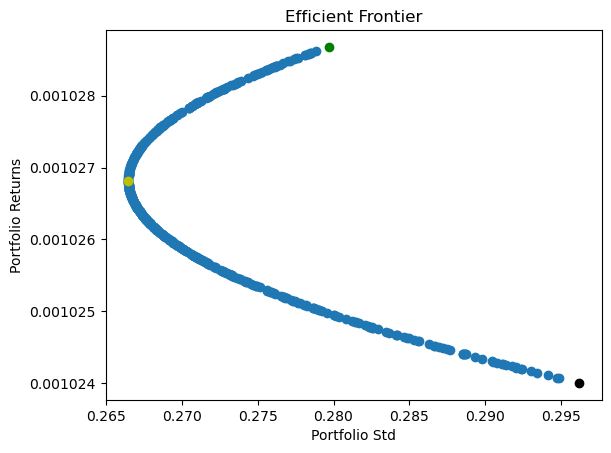

In [15]:
import matplotlib.pyplot as plt

plt.scatter(stds, returns)
plt.scatter(df.std().iloc[0]*np.sqrt(250), df.mean().iloc[0], c='k') # Understood.
plt.scatter(df.std().iloc[1]*np.sqrt(250), df.mean().iloc[1], c='g')
plt.scatter(min(stds), returns[stds.index(min(stds))], c='y')
plt.title("Efficient Frontier")
plt.xlabel("Portfolio Std")
plt.ylabel("Portfolio Returns")
plt.show()

In [16]:
returns[stds.index(min(stds))] #Understood

0.001026807050012613